In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
df_spend = pd.read_csv('k-mean-spend.csv', delimiter=',')

In [136]:
df_spend.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [176]:
df_spend.shape

(200, 6)

In [103]:
df_spend.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spend         0
dtype: int64

In [139]:
df_spend.rename(columns ={'Genre':'Gender','Annual Income (k$)': 'Income', 'Spending Score (1-100)':'Spend'}, inplace=True)
df_spend.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
grp = df_spend.groupby(by=['Gender']).mean()
grp

,CustomerID,Age,Income,Spend
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [34]:
import seaborn as sns

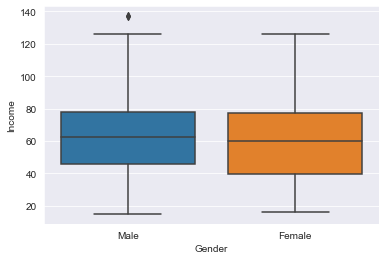

In [37]:
sns.set_style('darkgrid')
sns.boxplot(data = df_spend, x= 'Gender', y = 'Income')

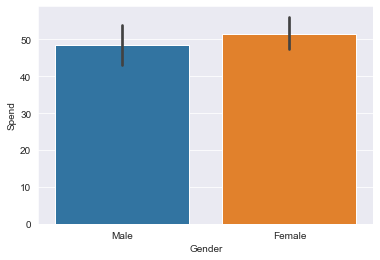

In [40]:
sns.set_style('darkgrid')
sns.barplot(data = df_spend, x= 'Gender', y = 'Spend')

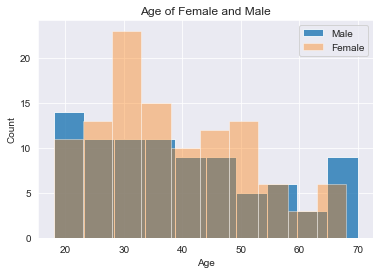

In [100]:
plt.hist(df_spend[df_spend["Gender"]=="Male"]["Age"].reset_index(drop=True), alpha=0.8, label="Male")
plt.hist(df_spend[df_spend["Gender"]=="Female"]["Age"].reset_index(drop=True), alpha=0.4, label="Female")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age of Female and Male')
plt.legend()
plt.show()


In [140]:
df_spend.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [141]:
df = df_spend.drop(columns='CustomerID', axis=1)

In [142]:
df['Income'] = df['Income'] * 1000
df

,Gender,Age,Income,Spend
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40
...,...,...,...,...
195,Female,35,120000,79
196,Female,45,126000,28
197,Male,32,126000,74
198,Male,32,137000,18


In [117]:
from sklearn import preprocessing

In [143]:
X = df_spend[['Gender', 'Age', 'Income', 'Spend']].values
X[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

In [144]:
X[:,0]

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


In [145]:
LE = preprocessing.LabelEncoder()
LE.fit(['Female', 'Male'])
X[:,0] = LE.transform(X[:,0]) 



In [146]:
X[0:5]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

In [147]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [148]:
X[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [149]:
from sklearn.cluster import KMeans

In [150]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 1 0 0 0 1 0 3 0 3 0 1 0 3 2 1 2 3 0 3 2 1 2 1 2 1 2 1 0 3 0 3 2 1 0 1
 0 1 0 1 2 3 0 1 0 1 0 0 0 1 2 0 3 1 3 1 3 0 3 3 2 1 1 3 2 1 1 2 0 3 1 1 1
 3 2 1 3 0 1 3 2 3 1 0 3 1 0 0 1 1 2 3 1 0 2 1 0 3 2 0 1 3 2 3 0 1 3 3 3 3
 0 1 2 0 0 1 1 1 1 2 1 0 2 0 0 3 2 3 2 3 2 0 0 3 0 1 2 3 0 1 2 0 0 3 2 3 0
 1 2 3 2 1 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 1 2 3 2 3 2 1 0 3 2 3 2 1 0 3 0 1
 2 1 2 1 0 1 0 3 0 1 0 1 2 3 2]


In [151]:
df_spend['Cluster'] = labels

In [153]:
df_spend.head()

,CustomerID,Gender,Age,Income,Spend,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [161]:
df_spend['Cluster'].value_counts().to_frame()

,Cluster
0,57
1,55
3,48
2,40


In [162]:
df_spend.groupby(by=['Cluster']).mean()


,CustomerID,Age,Income,Spend
Cluster,,,,
0,100.210526,28.438596,59.666667,67.684211
1,94.818182,48.109091,58.818182,34.781818
2,103.375000,28.250000,62.000000,71.675000
3,104.958333,49.437500,62.416667,29.208333


In [166]:
X[:, 2]

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

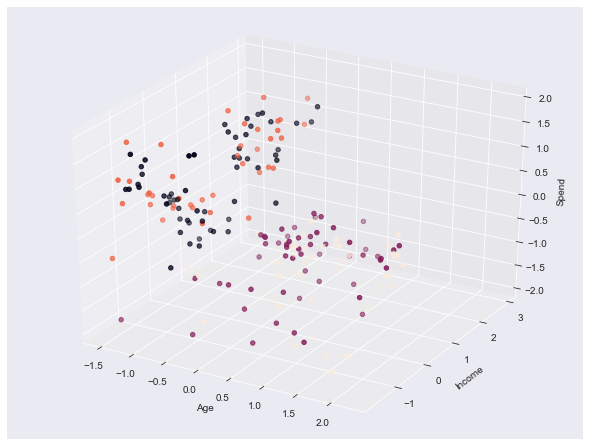

In [182]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spend')

ax.scatter(X[:, 1], X[:, 2], X[:, 3], c= labels.astype(np.float))